In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn

from utils import *

In [2]:
train_loader, val_loader, test_loader = create_dataloaders(batch_size=128, version='_Goose_1st', upsample=True)

TypeError: create_dataloaders() got an unexpected keyword argument 'upsample'

In [3]:
len(train_loader), len(val_loader), len(test_loader)

(288, 24, 60)

In [3]:
len(train_loader), len(val_loader), len(test_loader) # before upsample

(142, 24, 60)

In [4]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 10])
torch.Size([128, 1])
128
128
128


date:180325, rec:005, time:4156.0


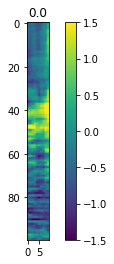

date:180401, rec:003, time:3287.0


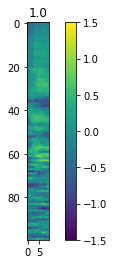

date:180326, rec:004, time:4575.0


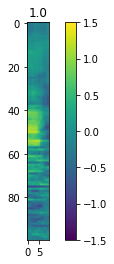

date:180325, rec:005, time:6243.0


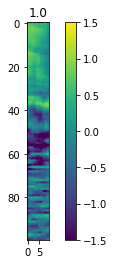

date:180327, rec:007, time:1930.0


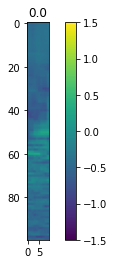

date:180322, rec:003, time:1373.0


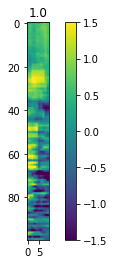

date:180401, rec:002, time:656.0


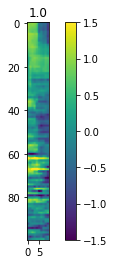

date:180324, rec:008, time:1821.0


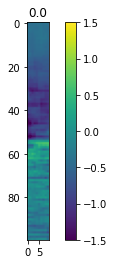

date:180325, rec:002, time:2595.0


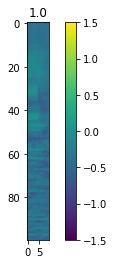

date:180323, rec:005, time:2287.0


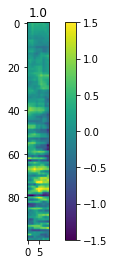

date:180324, rec:001, time:110.0


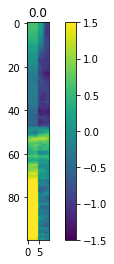

date:180327, rec:007, time:5631.0


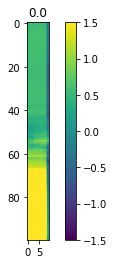

date:180327, rec:007, time:7171.0


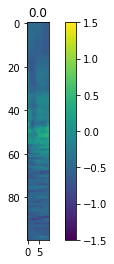

date:180401, rec:001, time:510.0


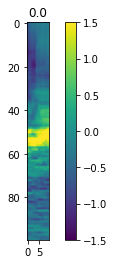

date:180327, rec:002, time:1490.0


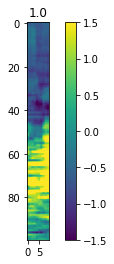

date:180326, rec:003, time:4796.0


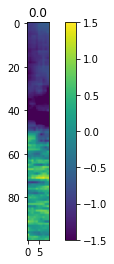

date:180323, rec:007, time:4281.0


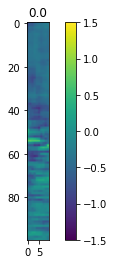

date:180327, rec:007, time:3780.0


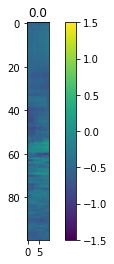

date:180324, rec:008, time:2241.0


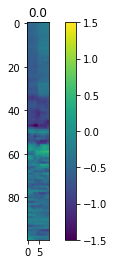

date:180325, rec:009, time:5049.0


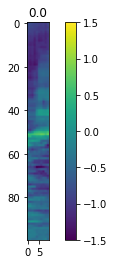

date:180322, rec:005, time:1835.0


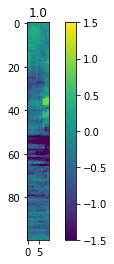

date:180323, rec:002, time:2626.0


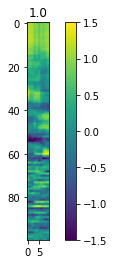

date:180327, rec:007, time:6031.0


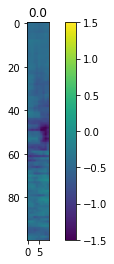

date:180325, rec:007, time:3276.0


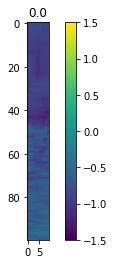

date:180327, rec:008, time:3832.0


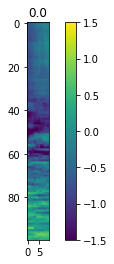

date:180325, rec:005, time:6523.0


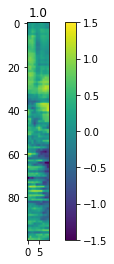

date:180401, rec:001, time:2109.0


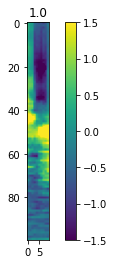

date:180322, rec:005, time:6344.0


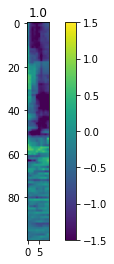

date:180325, rec:007, time:3432.0


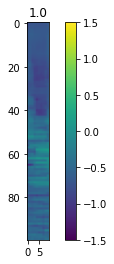

date:180323, rec:003, time:4961.0


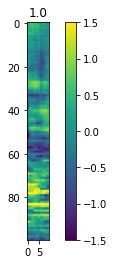

date:180325, rec:009, time:5608.0


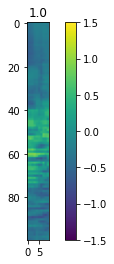

date:180327, rec:001, time:3414.0


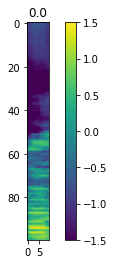

date:180324, rec:004, time:5832.0


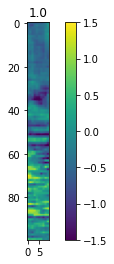

date:180324, rec:008, time:2898.0


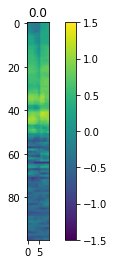

date:180325, rec:007, time:2103.0


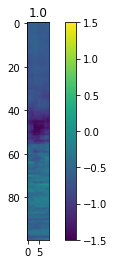

date:180325, rec:009, time:230.0


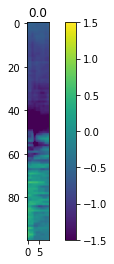

date:180326, rec:004, time:2239.0


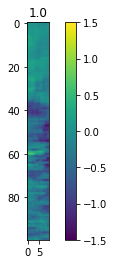

date:180324, rec:008, time:6634.0


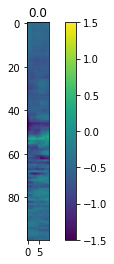

date:180324, rec:009, time:2192.0


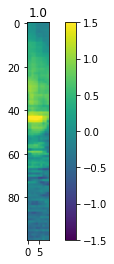

date:180327, rec:007, time:2690.0


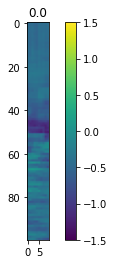

date:180401, rec:001, time:5277.0


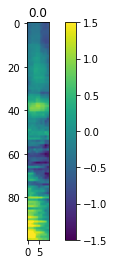

date:180324, rec:008, time:5584.0


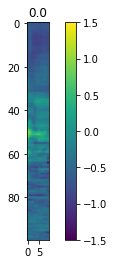

date:180325, rec:001, time:40.0


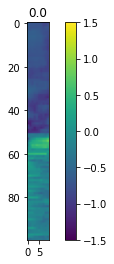

date:180324, rec:003, time:5258.0


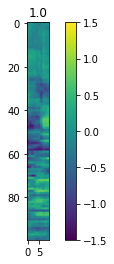

date:180327, rec:007, time:3130.0


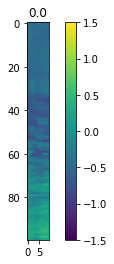

date:180327, rec:008, time:4963.0


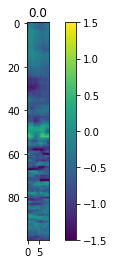

date:180327, rec:005, time:5568.0


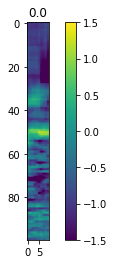

date:180323, rec:003, time:4567.0


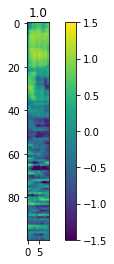

date:180324, rec:004, time:4509.0


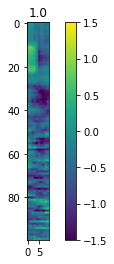

date:180324, rec:008, time:6824.0


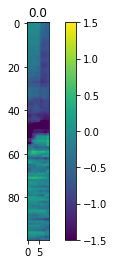

date:180324, rec:009, time:250.0


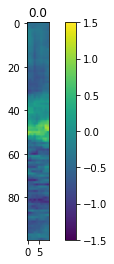

date:180326, rec:003, time:1884.0


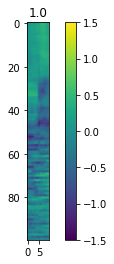

date:180324, rec:004, time:2319.0


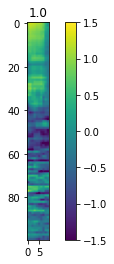

date:180327, rec:008, time:5023.0


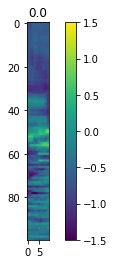

date:180326, rec:003, time:2949.0


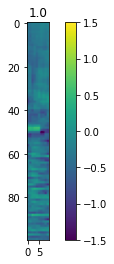

date:180327, rec:008, time:6959.0


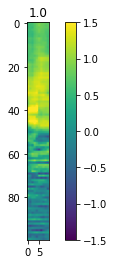

date:180324, rec:005, time:3279.0


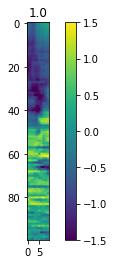

date:180327, rec:001, time:2210.0


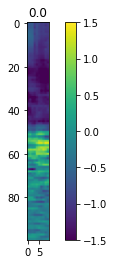

date:180322, rec:007, time:3589.0


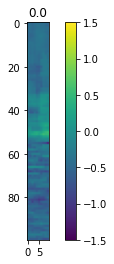

date:180401, rec:001, time:1150.0


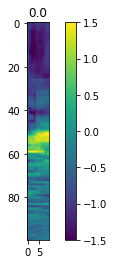

date:180327, rec:001, time:6942.0


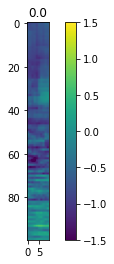

date:180324, rec:001, time:2437.0


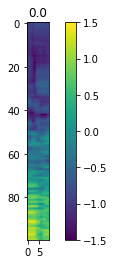

date:180323, rec:001, time:920.0


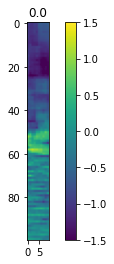

date:180325, rec:009, time:2240.0


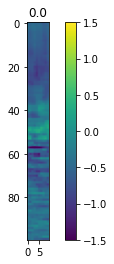

date:180322, rec:002, time:3739.0


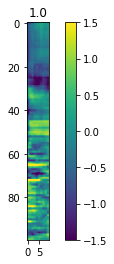

date:180326, rec:004, time:3817.0


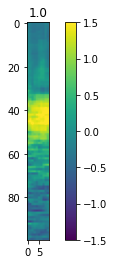

date:180326, rec:004, time:5766.0


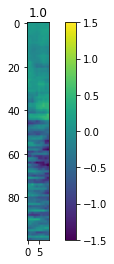

date:180327, rec:001, time:770.0


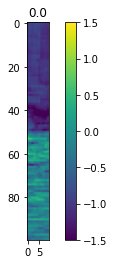

date:180325, rec:003, time:712.0


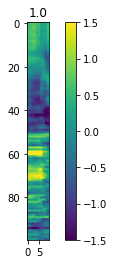

date:180324, rec:006, time:4468.0


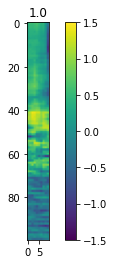

date:180322, rec:003, time:1403.0


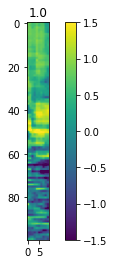

date:180327, rec:007, time:3440.0


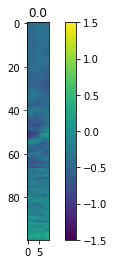

date:180323, rec:004, time:5419.0


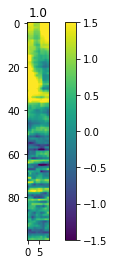

date:180401, rec:003, time:4457.0


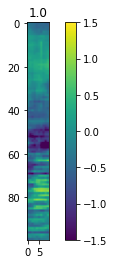

date:180326, rec:003, time:2304.0


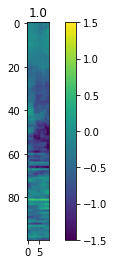

date:180327, rec:004, time:3235.0


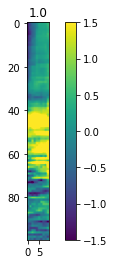

date:180323, rec:002, time:4236.0


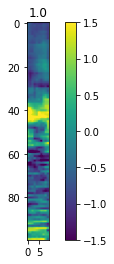

date:180327, rec:008, time:5023.0


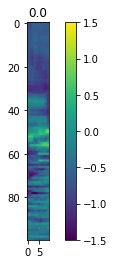

date:180325, rec:004, time:1568.0


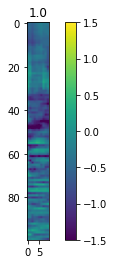

date:180401, rec:001, time:270.0


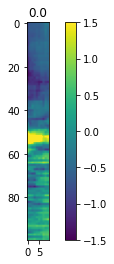

date:180322, rec:003, time:2948.0


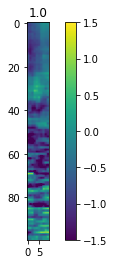

date:180327, rec:008, time:5063.0


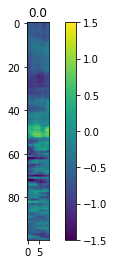

date:180327, rec:007, time:6021.0


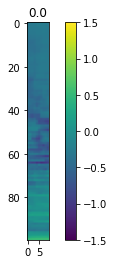

date:180322, rec:007, time:2283.0


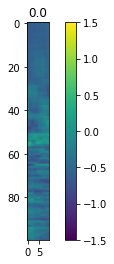

date:180323, rec:007, time:5551.0


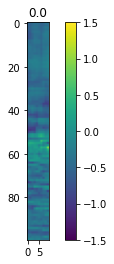

date:180325, rec:002, time:7039.0


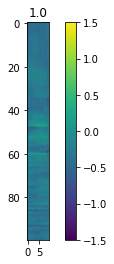

date:180327, rec:008, time:3452.0


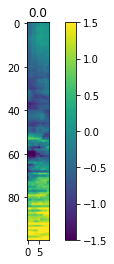

date:180324, rec:003, time:4515.0


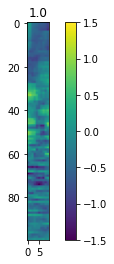

date:180401, rec:001, time:340.0


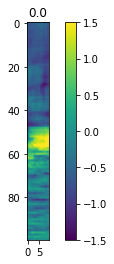

date:180324, rec:009, time:1892.0


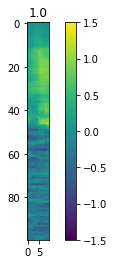

date:180326, rec:003, time:2499.0


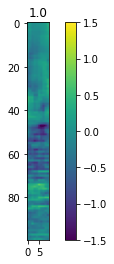

date:180323, rec:007, time:2945.0


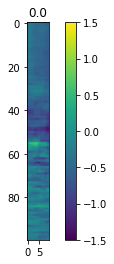

date:180401, rec:003, time:6198.0


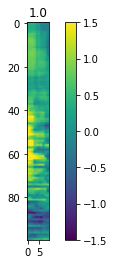

date:180322, rec:007, time:4990.0


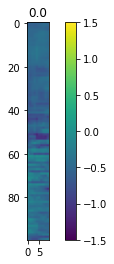

date:180326, rec:004, time:6950.0


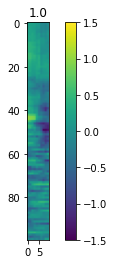

date:180325, rec:001, time:390.0


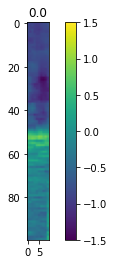

date:180325, rec:006, time:1838.0


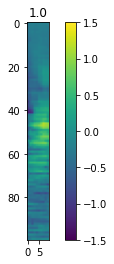

date:180401, rec:002, time:5387.0


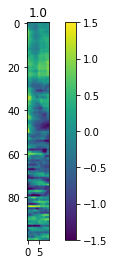

date:180323, rec:003, time:6072.0


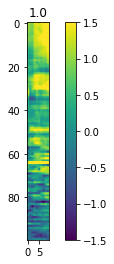

date:180324, rec:008, time:5894.0


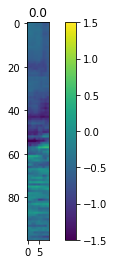

date:180324, rec:008, time:531.0


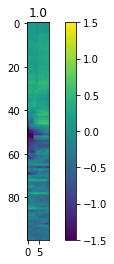

date:180323, rec:003, time:5411.0


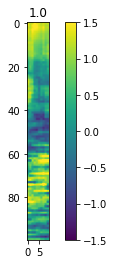

date:180327, rec:008, time:4893.0


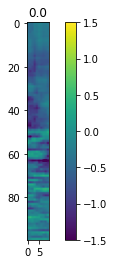

date:180325, rec:007, time:5873.0


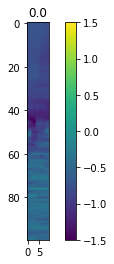

date:180401, rec:002, time:5187.0


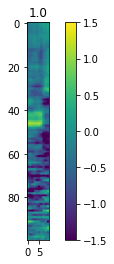

date:180327, rec:007, time:3650.0


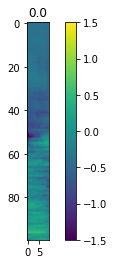

date:180325, rec:009, time:4739.0


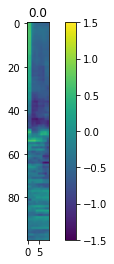

date:180327, rec:001, time:2110.0


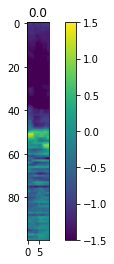

date:180327, rec:007, time:2690.0


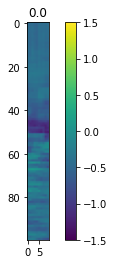

date:180322, rec:003, time:6646.0


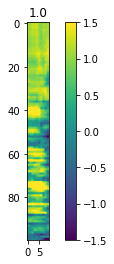

date:180322, rec:005, time:1985.0


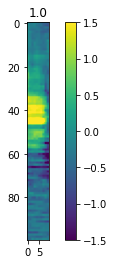

date:180327, rec:007, time:3430.0


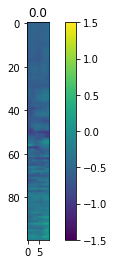

date:180322, rec:007, time:4950.0


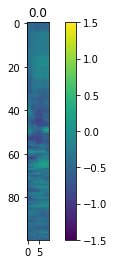

date:180327, rec:001, time:2230.0


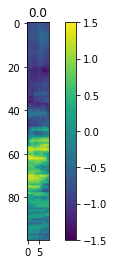

date:180324, rec:001, time:6239.0


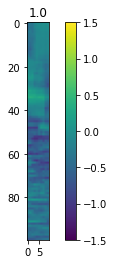

date:180327, rec:008, time:4142.0


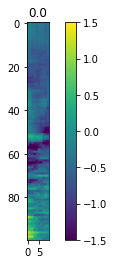

date:180401, rec:001, time:5297.0


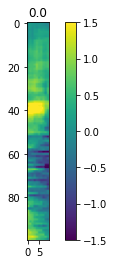

date:180325, rec:006, time:1319.0


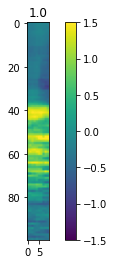

date:180325, rec:005, time:1304.0


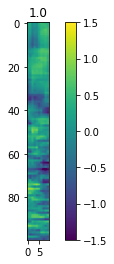

date:180324, rec:005, time:2924.0


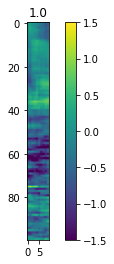

date:180324, rec:008, time:4474.0


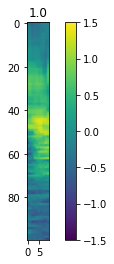

date:180322, rec:005, time:3091.0


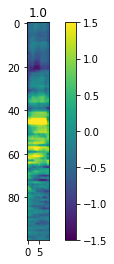

date:180327, rec:004, time:3055.0


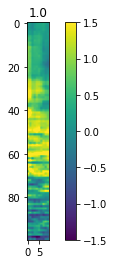

date:180325, rec:001, time:1200.0


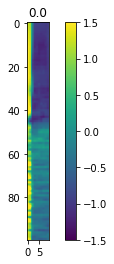

date:180323, rec:003, time:5401.0


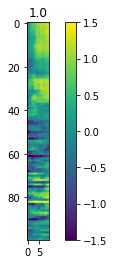

date:180327, rec:005, time:720.0


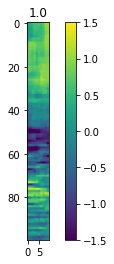

date:180325, rec:001, time:2100.0


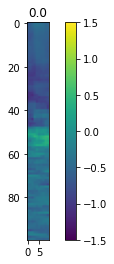

date:180323, rec:007, time:3015.0


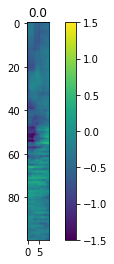

In [8]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0
alpha = 0
CH = 'all'

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda


In [12]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model_Goose_1st_upsample'
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

Train loss for epoch 0: 0.6859081387519836
Val loss for epoch 0: 1.1238747835159302
Train loss for epoch 1: 0.44879579544067383
Val loss for epoch 1: 0.8565247058868408
1
Train loss for epoch 2: 0.409788578748703
Val loss for epoch 2: 0.7419387698173523
2
Train loss for epoch 3: 0.3898356854915619
Val loss for epoch 3: 0.8775033354759216
Train loss for epoch 4: 0.3374200165271759
Val loss for epoch 4: 0.9350875616073608
Train loss for epoch 5: 0.34381169080734253
Val loss for epoch 5: 1.6417465209960938
Train loss for epoch 6: 0.34590262174606323
Val loss for epoch 6: 0.7424824237823486
Train loss for epoch 7: 0.312448650598526
Val loss for epoch 7: 0.8216408491134644
Train loss for epoch 8: 0.26158079504966736
Val loss for epoch 8: 0.8540481925010681
Train loss for epoch 9: 0.2850606143474579
Val loss for epoch 9: 0.7611664533615112
Train loss for epoch 10: 0.29954826831817627
Val loss for epoch 10: 0.794796884059906
Train loss for epoch 11: 0.23533132672309875
Val loss for epoch 11: 

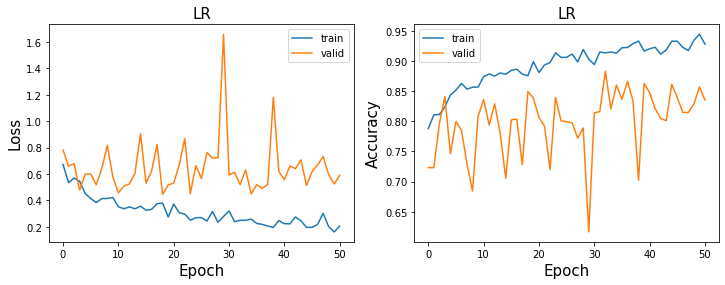

In [11]:
plt.figure(figsize=(12,4)) # no upsample
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

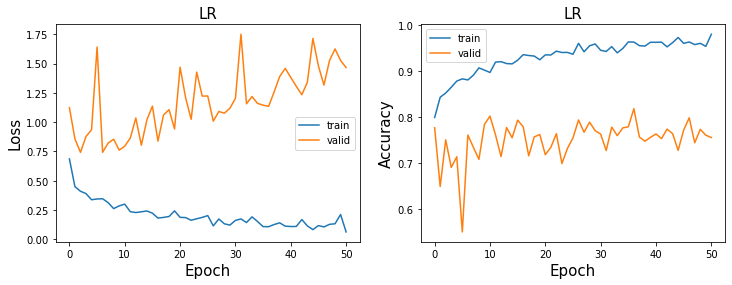

In [13]:
plt.figure(figsize=(12,4)) # upsample
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

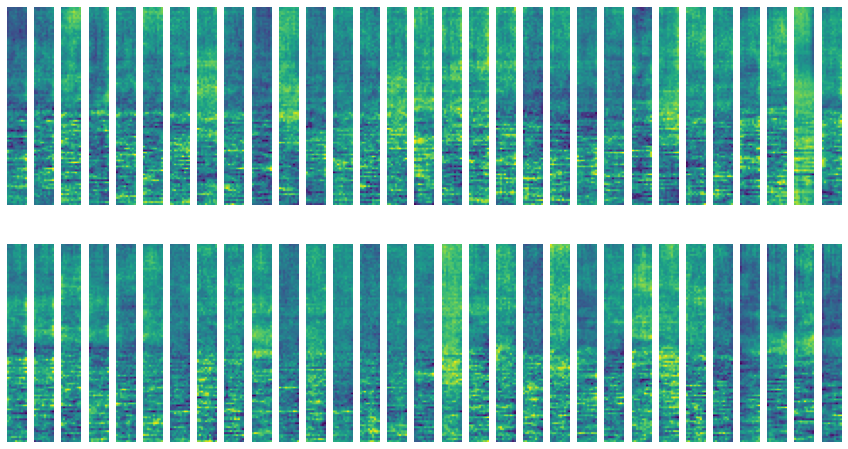

In [30]:
model = LogReg().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model_Goose_1st_upsample'
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch2.pt'.format(path, CH, l2, alpha)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [31]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
# test loss:0.38072946667671204 accuracy:0.8793012175754368 without upsample

test loss:0.7140886187553406 accuracy:0.8013499205929063


In [32]:
np.mean(np.concatenate(test_labels))

0.7769984

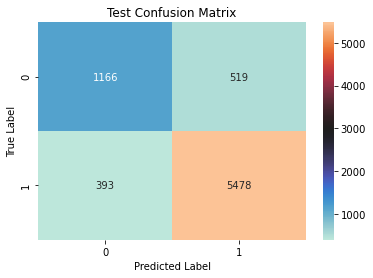

In [24]:
predictions_test = np.concatenate(test_preds) # no upsample
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

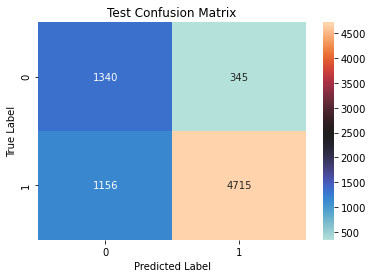

In [33]:
predictions_test = np.concatenate(test_preds) # upsample
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2500)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:006, time:6100.0, label:1.0
Original data 62 CH


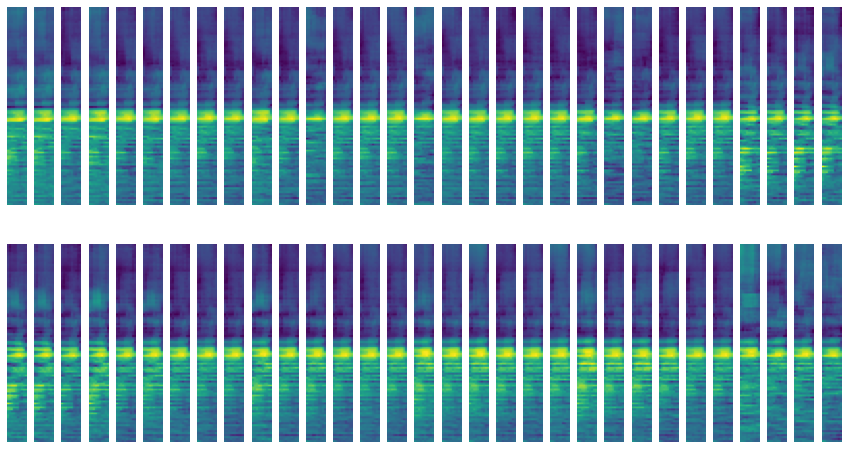

In [34]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_1[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

date:180330, rec:007, time:6828.0, label:1.0
Original data 62 CH


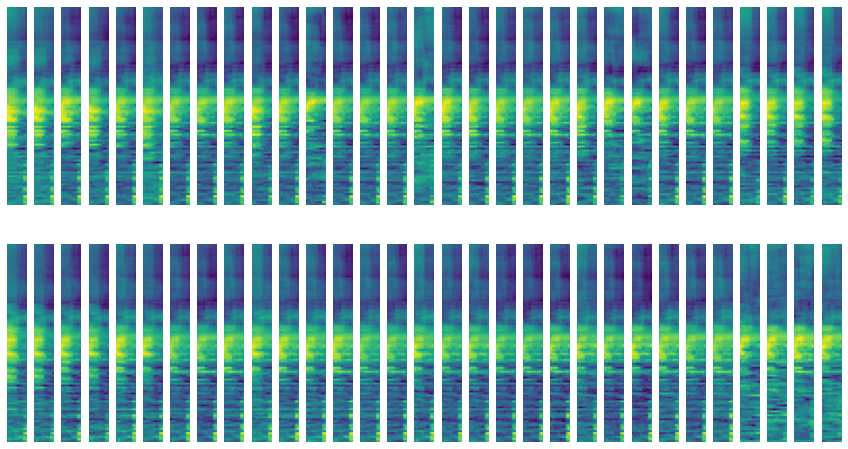

In [35]:
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[1][0], cases_wrong_1[1][1], cases_wrong_1[1][2], cases_wrong_1[1][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_1[1][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0.1
alpha = 0
CH = 'all'

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=l2)

cuda


In [15]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model_Goose_1st_upsample'
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

Train loss for epoch 0: 1.1994389295578003
Val loss for epoch 0: 1.1169911623001099
Train loss for epoch 1: 0.4655236601829529
Val loss for epoch 1: 0.7674962878227234
1
Train loss for epoch 2: 0.44351285696029663
Val loss for epoch 2: 0.9912288188934326
Train loss for epoch 3: 0.4790306091308594
Val loss for epoch 3: 0.7144322395324707
3
Train loss for epoch 4: 0.5027948021888733
Val loss for epoch 4: 1.1406357288360596
Train loss for epoch 5: 0.49641090631484985
Val loss for epoch 5: 0.77287358045578
Train loss for epoch 6: 0.5034416317939758
Val loss for epoch 6: 0.6475119590759277
6
Train loss for epoch 7: 0.47252973914146423
Val loss for epoch 7: 0.9494369029998779
Train loss for epoch 8: 0.45712947845458984
Val loss for epoch 8: 1.1149049997329712
Train loss for epoch 9: 0.4695354700088501
Val loss for epoch 9: 0.5921022891998291
9
Train loss for epoch 10: 0.48377206921577454
Val loss for epoch 10: 1.0323803424835205
Train loss for epoch 11: 0.4653661549091339
Val loss for epoch 

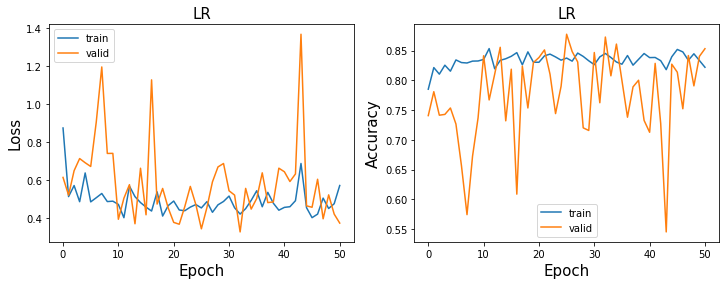

In [8]:
plt.figure(figsize=(12,4)) # no upsample
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

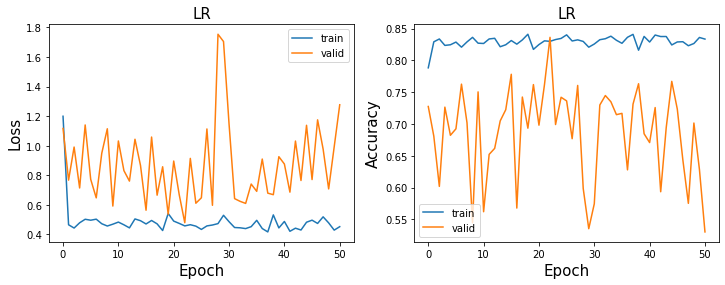

In [16]:
plt.figure(figsize=(12,4)) # upsample
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

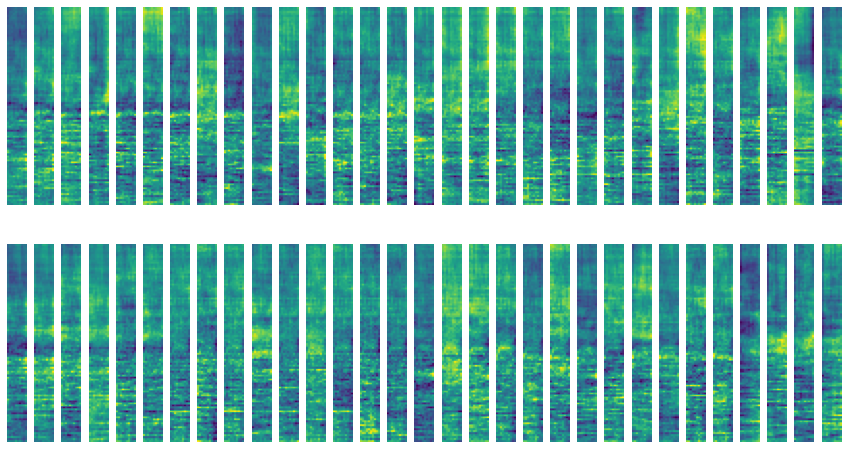

In [40]:
model = LogReg().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model_Goose_1st_upsample'
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch22.pt'.format(path, CH, l2, alpha)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [41]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
# test loss:0.4904329776763916 accuracy:0.8227898358920064 without upsample

test loss:0.6533432602882385 accuracy:0.8139227104287983


In [42]:
np.mean(np.concatenate(test_labels))

0.7769984

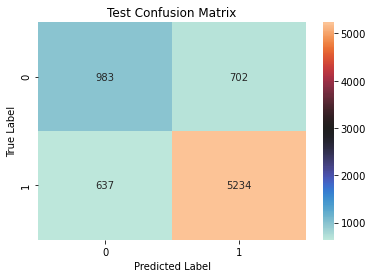

In [30]:
predictions_test = np.concatenate(test_preds) # no upsample
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

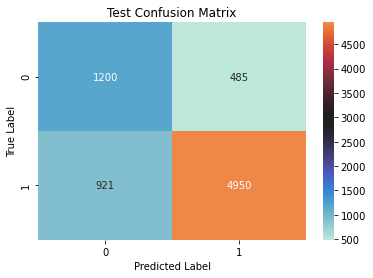

In [43]:
predictions_test = np.concatenate(test_preds) # upsample
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:006, time:006, label:1.0
Original data 62 CH


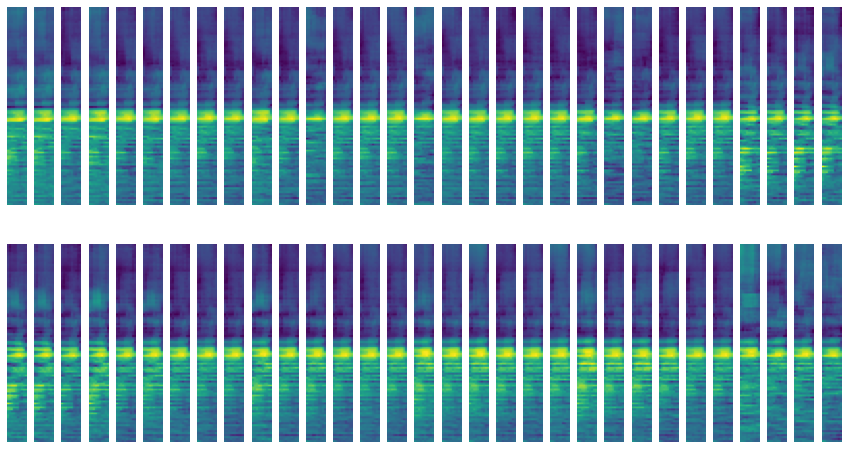

In [44]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][1], cases_wrong_2[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_2[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0
alpha = 0.1
CH = 'all'

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda


In [18]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model_Goose_1st_upsample'
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

Train loss for epoch 0: 0.8575226664543152
Val loss for epoch 0: 1.1674635410308838
Train loss for epoch 1: 0.5631516575813293
Val loss for epoch 1: 1.1108372211456299
1
Train loss for epoch 2: 0.5495374798774719
Val loss for epoch 2: 0.8825637102127075
2
Train loss for epoch 3: 0.5079877972602844
Val loss for epoch 3: 0.7033007144927979
3
Train loss for epoch 4: 0.5183475613594055
Val loss for epoch 4: 1.412244200706482
Train loss for epoch 5: 0.5384026169776917
Val loss for epoch 5: 0.7294508218765259
Train loss for epoch 6: 0.5553908944129944
Val loss for epoch 6: 0.788808286190033
Train loss for epoch 7: 0.5011429190635681
Val loss for epoch 7: 0.8249174952507019
Train loss for epoch 8: 0.49648889899253845
Val loss for epoch 8: 0.556451141834259
8
Train loss for epoch 9: 0.5404411554336548
Val loss for epoch 9: 0.799554705619812
Train loss for epoch 10: 0.49973049759864807
Val loss for epoch 10: 0.739976167678833
Train loss for epoch 11: 0.5430943369865417
Val loss for epoch 11: 0.

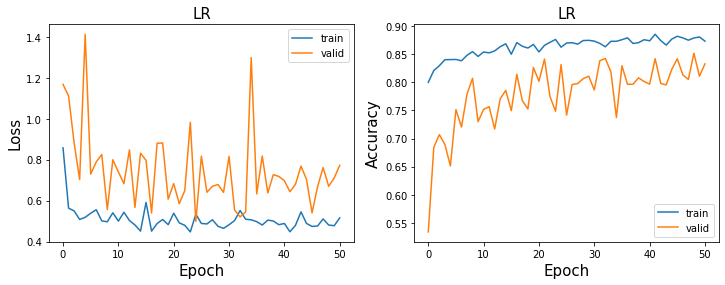

In [19]:
plt.figure(figsize=(12,4)) # upsample
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

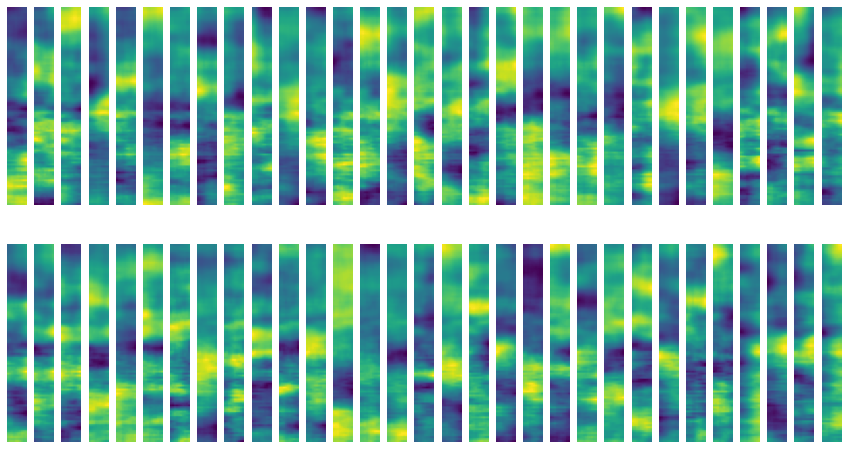

In [46]:
model = LogReg().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model_Goose_1st_upsample'
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch24.pt'.format(path, CH, l2, alpha)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [47]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.5661962628364563 accuracy:0.8320539968237163


In [48]:
np.mean(np.concatenate(test_labels))

0.7769984

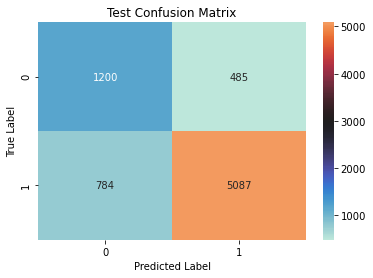

In [49]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:006, time:006, label:1.0
Original data 62 CH


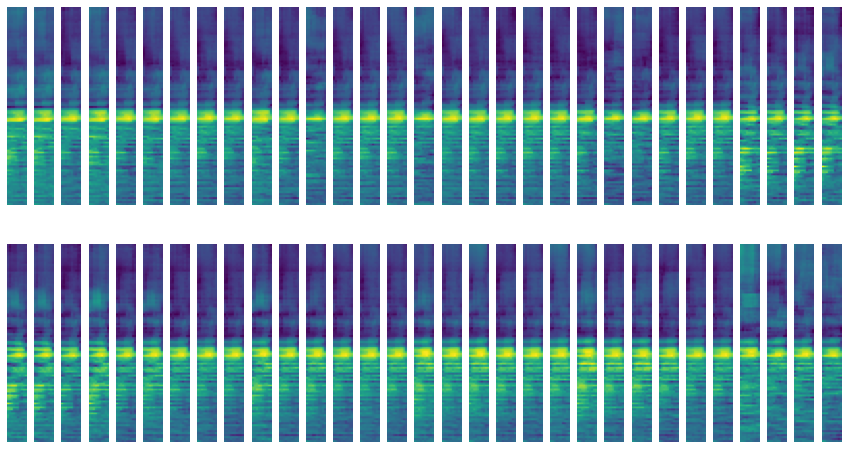

In [50]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][1], cases_wrong_2[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_2[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()